In [1]:
%load_ext autotime

import scarf
scarf.__version__

'0.20.0'

time: 1.2 s (started: 2022-08-13 14:53:33 +02:00)


In [2]:
scarf.fetch_dataset('zalando_60K_fmnist_images', save_path='scarf_datasets')

time: 16.3 s (started: 2022-08-13 14:53:34 +02:00)


In [4]:
reader = scarf.CrDirReader(
    'scarf_datasets/zalando_60K_fmnist_images',
    'rna', index_offset=0
)

time: 47 ms (started: 2022-08-13 14:53:57 +02:00)


In [6]:
writer = scarf.CrToZarr(
    reader,
    zarr_fn='scarf_datasets/zalando_60K_fmnist_images/data.zarr',
    chunk_size=(2000, 1000),
)
writer.dump(batch_size=1000)

  0%|                                                                                                         …

time: 12.4 s (started: 2022-08-13 14:54:09 +02:00)


In [7]:
ds = scarf.DataStore(
    'scarf_datasets/zalando_60K_fmnist_images/data.zarr',
    min_cells_per_feature=0,
    nthreads=4
)
ds.cells.insert('label',
                [int(x.rsplit('_', 1)[-1])-1 for x
                 in ds.cells.fetch_all('names')])

(RNA) Computing nCells and dropOuts:   0%|                                                                    …

(RNA) Computing nCounts:   0%|                                                                                …

(RNA) Computing nFeatures:   0%|                                                                              …

time: 859 ms (started: 2022-08-13 14:54:21 +02:00)


In [8]:
ds.make_graph(feat_key='I', k=11, dims=30, n_centroids=100, ann_parallel=True)

Normalizing with feature subset:   0%|                                                                        …

Writing data to normed__I__I/data:   0%|                                                                      …

Calculating mean of norm. data:   0%|                                                                         …

Calculating std. dev. of norm. data:   0%|                                                                    …

Fitting PCA:   0%|                                                                                            …

Fitting ANN:   0%|                                                                                            …

Fitting kmeans:   0%|                                                                                         …

Estimating seed partitions:   0%|                                                                             …

Saving KNN graph:   0%|                                                                                       …

Smoothening KNN distances:   0%|                                                                              …

INFO: ANN recall: 99.95%
time: 1min 6s (started: 2022-08-13 14:54:37 +02:00)


In [9]:
ds.run_umap(n_epochs=300, spread=1, min_dist=0.1)

Training UMAP:   0%|                                                                                          …

time: 1min 28s (started: 2022-08-13 14:55:53 +02:00)


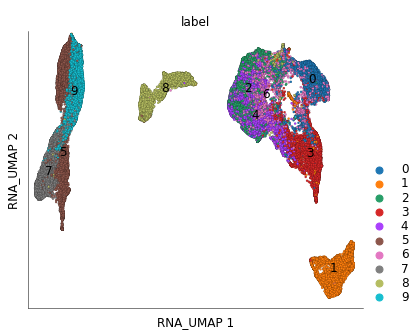

time: 2.44 s (started: 2022-08-13 14:57:22 +02:00)


In [10]:
ds.plot_layout(
    layout_key='RNA_UMAP', point_size=5, color_by='label'
)